In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
from wordcloud import WordCloud
import jieba
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import os

In [11]:
data_path = '/home/undergrad/ThreadsScamDetector/Agentic_AI/v2/data/data_0228_1314_gamble.json'

with open(data_path, "r", encoding = 'utf-8') as file:
    data = json.load(file)


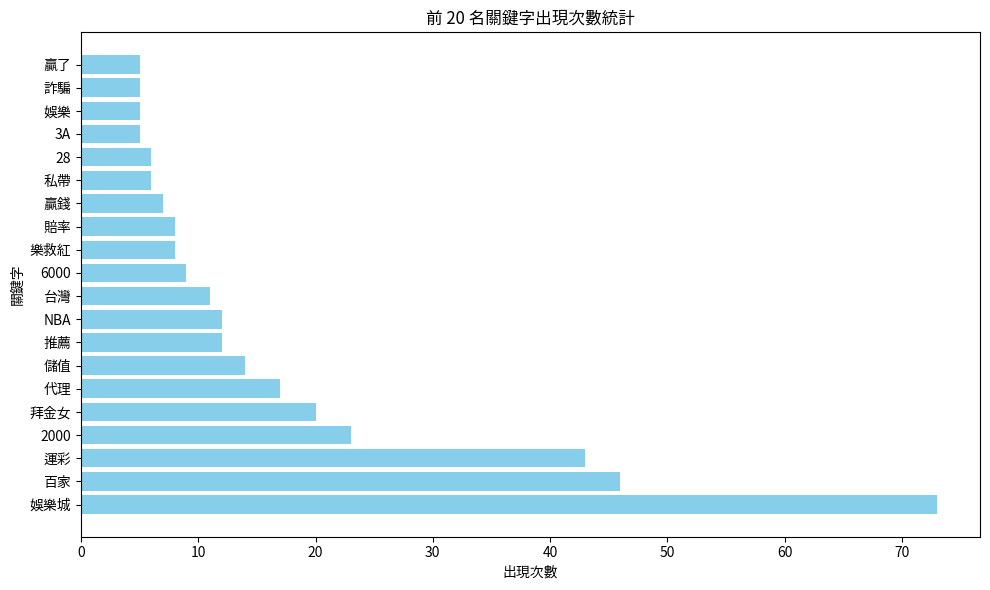

In [21]:
import jieba.analyse
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

keyword_counts = {}
remove_keywords = ["覺得", "時候", "沒有", "怎麼", "還是", "這個", "因為", "我們", "一個", "什麼", "不會", "他們", "開始", "這樣", "現在", "10", "其實","這麼","不用","結果", "有什麼","你們"]  # 根據需要添加要刪除的關鍵字


for item in data:
    for i in item:
        text = i["text"]
        keywords = jieba.analyse.extract_tags(text, topK=5)
        for keyword in keywords:
            if keyword not in remove_keywords:  # 檢查是否在要刪除的關鍵字列表中
                if keyword in keyword_counts:
                    keyword_counts[keyword] += 1
                else:
                    keyword_counts[keyword] = 1

keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])

# 獲取前 10 名關鍵字
top_keywords = keyword_df.nlargest(20, 'Count')

# 繪製橫向條形圖
plt.figure(figsize=(10, 6))
plt.barh(top_keywords['Keyword'], top_keywords['Count'], color='skyblue')
plt.ylabel('關鍵字')
plt.xlabel('出現次數')
plt.title('前 20 名關鍵字出現次數統計')
plt.tight_layout()  # 自動調整佈局
plt.show()


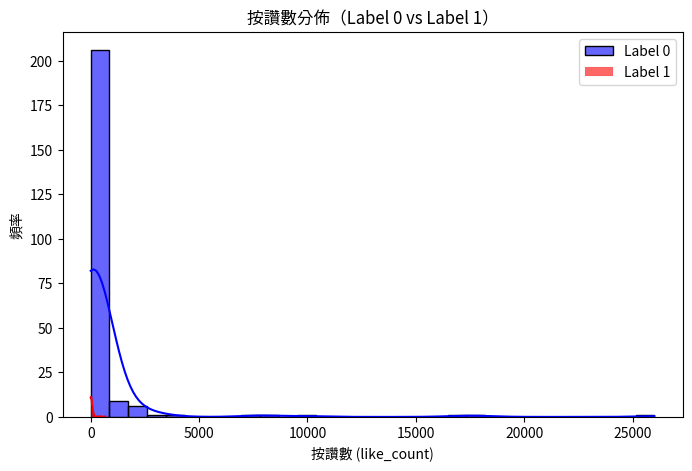

In [31]:
label_0 = []
label_1 = []

for item in data:
    for i in item:
        if (isinstance(i["like_count"], str)):
            like_count = (i["like_count"].replace(",", "").strip())
            if "萬" in like_count:
                like_count = float(i["like_count"].replace("萬", ""))*10000
            like_count = int(like_count)
        else:
            like_count = i["like_count"]
        label = int(i["label"])
        
        if (label == 0):
            label_0.append(like_count)
        else:
            label_1.append(like_count)
            
        


plt.figure(figsize=(8, 5))
sns.histplot(label_0, bins=30, label="Label 0", color="blue", alpha=0.6, kde=True)
sns.histplot(label_1, bins=30, label="Label 1", color="red", alpha=0.6, kde=True)

plt.xlabel("按讚數 (like_count)")
plt.ylabel("頻率")
plt.title("按讚數分佈（Label 0 vs Label 1）")
plt.legend()
plt.show()